In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sqlite3 import connect

In [2]:
df = pd.read_csv("../abusive_alay_count.csv")
df.head()

,Tweet,Alay Count,Abusive Count,Word Count,Status,Alay Percentage,Abusive Percentage
0,disaat semua cowok berusaha melacak perhatian ...,5,1,21,Alay & Abusive,0.238095,0.047619
1,siapa yang telat ngasih tau elu edan sarap gue...,3,2,19,Alay & Abusive,0.157895,0.105263
2,41 kadang aku berfikir kenapa aku tetap percay...,3,0,38,Alay,0.078947,0.000000
3,aku itu aku ku tau matamu sipit tapi diliat da...,1,1,13,Alay & Abusive,0.076923,0.076923
4,kaum cebong kapir udah keliatan dongoknya dari...,5,2,12,Alay & Abusive,0.416667,0.166667


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12894 entries, 0 to 12893
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tweet               12894 non-null  object 
 1   Alay Count          12894 non-null  int64  
 2   Abusive Count       12894 non-null  int64  
 3   Word Count          12894 non-null  int64  
 4   Status              12894 non-null  object 
 5   Alay Percentage     12894 non-null  float64
 6   Abusive Percentage  12894 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 705.3+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x2bcc2445b20>,
 'caps': [<matplotlib.lines.Line2D at 0x2bcc2446960>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bcc2446210>],
 'medians': [<matplotlib.lines.Line2D at 0x2bcc2445c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bcc24471a0>],
 'means': []}

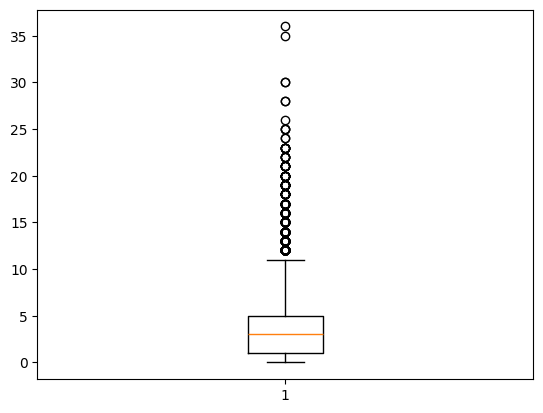

In [14]:
plt.boxplot(df['Alay Count'])

<Axes: >

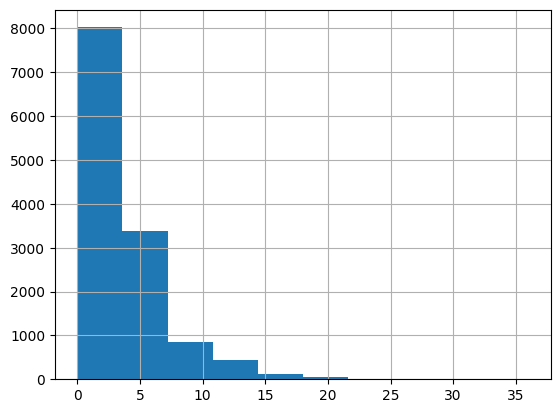

In [23]:
df['Alay Count'].hist()

<Axes: xlabel='Status', ylabel='count'>

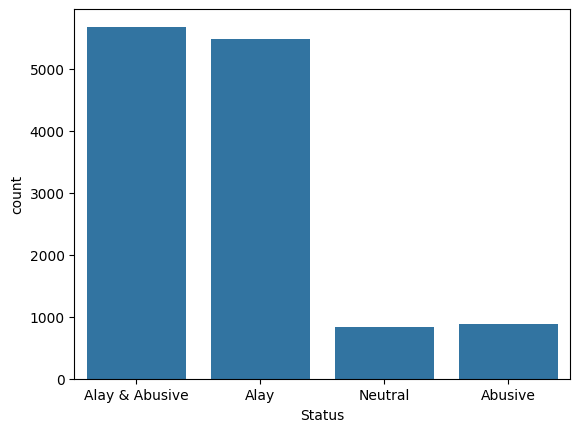

In [4]:
sns.countplot(x='Status', data=df)

In [18]:
stats_df=df[["Alay Count", "Abusive Count", "Word Count","Alay Percentage", "Abusive Percentage"]]
stats_df.head()

,Alay Count,Abusive Count,Word Count,Alay Percentage,Abusive Percentage
0,5,1,21,0.238095,0.047619
1,3,2,19,0.157895,0.105263
2,3,0,38,0.078947,0.000000
3,1,1,13,0.076923,0.076923
4,5,2,12,0.416667,0.166667


In [21]:
corr = stats_df.corr()
corr

,Alay Count,Abusive Count,Word Count,Alay Percentage,Abusive Percentage
Alay Count,1.000000,0.093405,0.608328,0.540423,-0.221262
Abusive Count,0.093405,1.000000,0.028130,0.039709,0.590530
Word Count,0.608328,0.028130,1.000000,-0.115757,-0.395251
Alay Percentage,0.540423,0.039709,-0.115757,1.000000,0.022723
Abusive Percentage,-0.221262,0.590530,-0.395251,0.022723,1.000000


<Axes: >

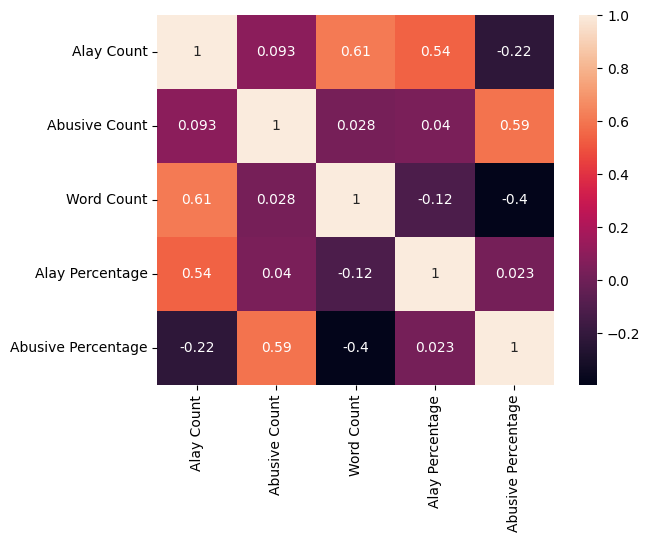

In [31]:
corr = stats_df.corr()
sns.heatmap(corr, annot=True)

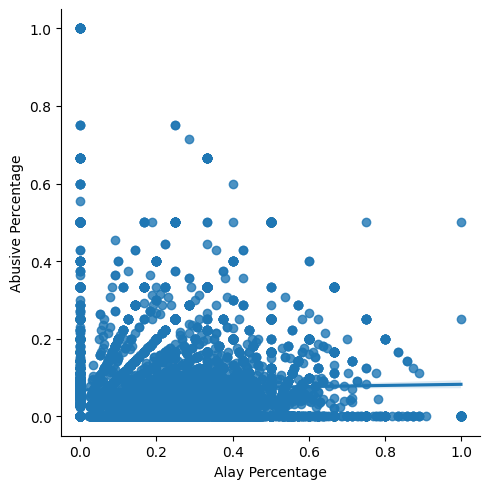

In [3]:
sns.lmplot(x='Alay Percentage', y='Abusive Percentage', data=df, fit_reg=True)

In [16]:
df[["Alay Count", "Abusive Count", "Word Count","Alay Percentage", "Abusive Percentage"]].corr()

,Alay Count,Abusive Count,Word Count,Alay Percentage,Abusive Percentage
Alay Count,1.000000,0.093405,0.608328,0.540423,-0.221262
Abusive Count,0.093405,1.000000,0.028130,0.039709,0.590530
Word Count,0.608328,0.028130,1.000000,-0.115757,-0.395251
Alay Percentage,0.540423,0.039709,-0.115757,1.000000,0.022723
Abusive Percentage,-0.221262,0.590530,-0.395251,0.022723,1.000000


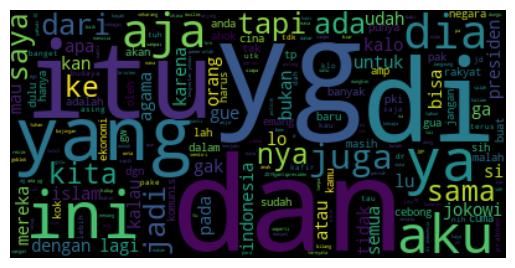

In [30]:
from wordcloud import WordCloud
text = ' '.join(df['Tweet'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
stats_df.describe(include='all')

,Alay Count,Abusive Count,Word Count,Alay Percentage,Abusive Percentage
count,12894.000000,12894.000000,12894.000000,12894.000000,12894.000000
mean,3.541104,0.680627,16.088025,0.233447,0.071404
std,3.500182,0.848430,10.426978,0.177814,0.113595
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,8.000000,0.100000,0.000000
50%,3.000000,1.000000,14.000000,0.208333,0.025000
75%,5.000000,1.000000,22.000000,0.333333,0.100000
max,36.000000,15.000000,52.000000,1.000000,1.000000
